In [1]:
! apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:12 http://ppa.launchpad.net/cran/libgit2/u

In [2]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [3]:
! wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz

In [4]:
! tar xf spark-2.3.1-bin-hadoop2.7.tgz

In [5]:
! pip install -q findspark

In [6]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"


In [ ]:
# ! ls

In [7]:
import findspark

findspark.init()

In [169]:
import pyspark
import os
from pyspark.sql import SparkSession


In [9]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [11]:
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java


update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [12]:
!java -version

openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


In [68]:
# from pyspark.conf import SparkConf

In [116]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("WordCount")\
    .getOrCreate()

In [117]:
sc=spark.sparkContext

In [206]:
text = spark.read.text("content/*")
text=text.rdd

In [174]:
# text.createOrReplaceTempView("text")

In [182]:
# spark.sql("""
# select * 
# from text
# order by length(value)
# """).show()

In [171]:
# df=spark.sql("select * from xxx")
# df.write.mode('overwrite').parquet("content/agg.parquet")
# spark.sql("select * from xxx").write.mode('overwrite').parquet("content/agg.parquet")

['value']

In [214]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;“”<=>?@[\\]^_`{|}~-1234567890'
  lowercased_str = x.value.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [215]:
text_new = text.map(lower_clean_str)

In [216]:
text_count = text_new.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))

In [217]:
#Строка не срабатывает в google colab
text_count = text_count.reduceByKey(lambda x, y: x+y)

In [219]:
text_count.count()

819

In [221]:
df1=text_count.toDF().sort('_2',ascending=False).toPandas()

In [222]:
df1=df1.rename(columns={"_1": "word", "_2": "cnt"})

In [ ]:
import nltk
from nltk.corpus import stopwords

In [186]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [188]:
stopwords=stopwords.words('english')

In [256]:
# df1 = df1.rename(columns={'_1':'word', '_2':'count'})

df1 = df1[~df1['word'].isin(stopwords)]
# df_final = df1.sort_values('count', ascending=False).head(10)
n=20
result=df1.iloc[2:].head(n)

In [260]:
# df1.head(30)

In [ ]:
# df1.count()

Визуализация

In [249]:
result.to_csv(f"top{n}_words.csv")

In [250]:
result['word']=result['word'].astype(str)

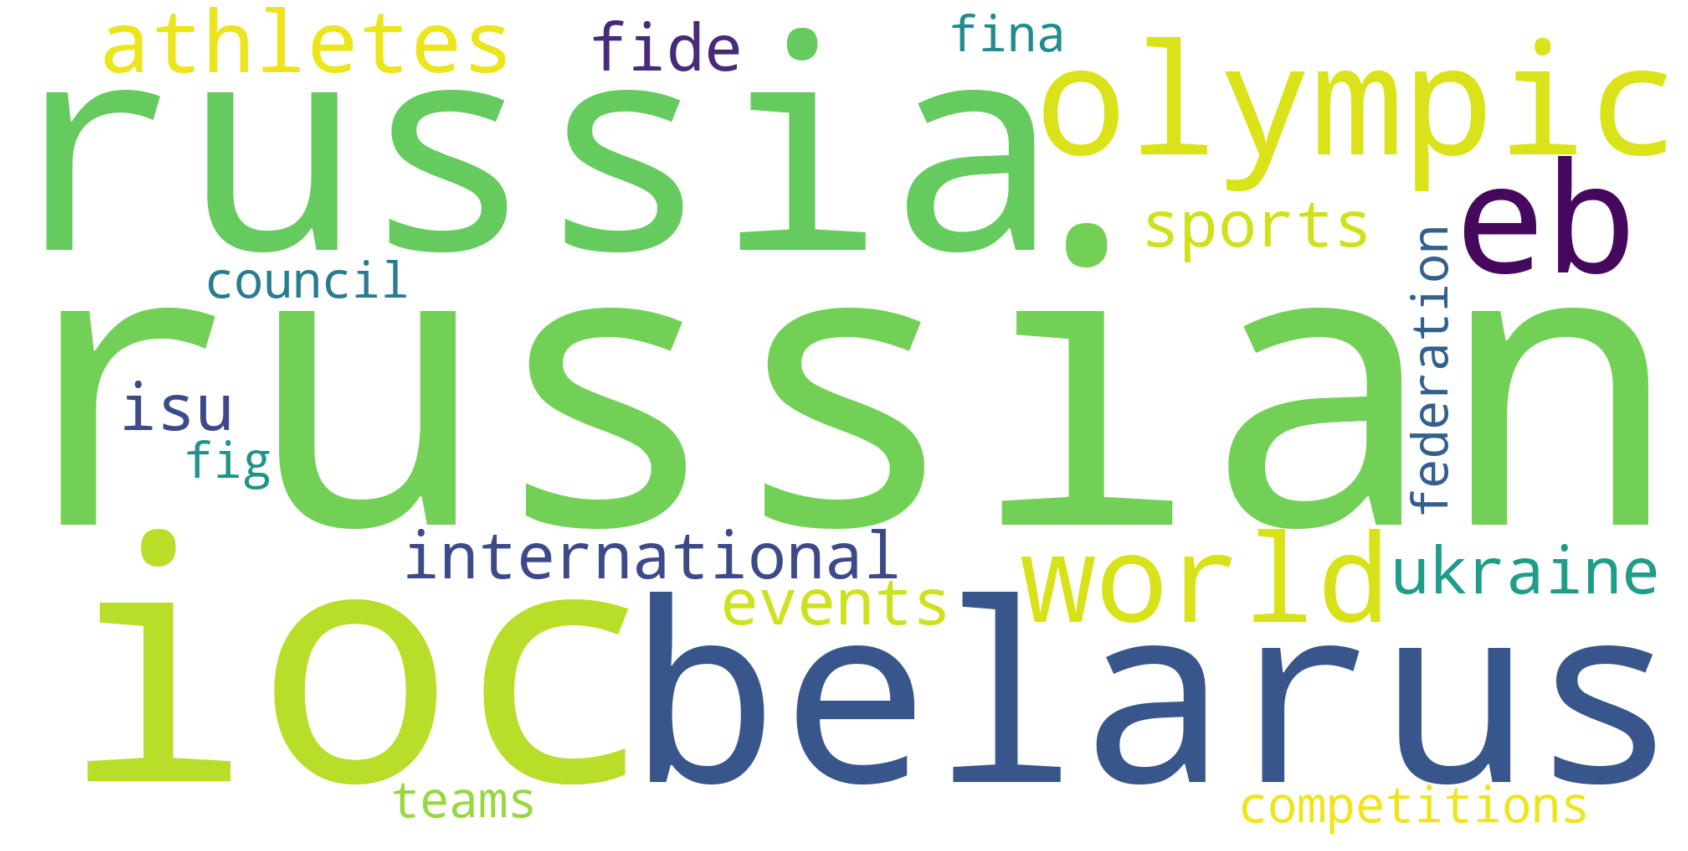

In [251]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = ' '.join(result.word.values)
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, collocations=False, background_color="white").generate(text)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save image

#wordcloud.to_file("/Users/futamatatakumi/Documents/Python/Research Seminar/result.png")